### Data Mining and Machine Learning
### Clustering I. Distances and Partitioning algorithms for clustering
### Edgar Acuna 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  I.  Computing distances for  Diabetes

In [2]:
url= "c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)

(768, 9)


In [3]:
yd=data['class']
Xd=data.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(Xd)
Xd= scaler.transform(Xd)

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [4]:
#distancia Euclideana
dist2=pairwise_distances(Xd)
dist2

array([[0.        , 3.22924385, 3.25837474, ..., 2.72463806, 2.97509995,
        3.4017847 ],
       [3.22924385, 0.        , 4.26273005, ..., 1.99408342, 2.6650958 ,
        0.91047974],
       [3.25837474, 4.26273005, 0.        , ..., 3.09591822, 3.29725594,
        4.32363443],
       ...,
       [2.72463806, 1.99408342, 3.09591822, ..., 0.        , 2.69881799,
        2.01762486],
       [2.97509995, 2.6650958 , 3.29725594, ..., 2.69881799, 0.        ,
        3.04917966],
       [3.4017847 , 0.91047974, 4.32363443, ..., 2.01762486, 3.04917966,
        0.        ]])

In [5]:
#Euclidean distance as a particular case of the Minkowski distance
dist_e=DistanceMetric.get_metric("minkowski",p=2)
dist_e.pairwise(Xd)

array([[0.        , 3.22924385, 3.25837474, ..., 2.72463806, 2.97509995,
        3.4017847 ],
       [3.22924385, 0.        , 4.26273005, ..., 1.99408342, 2.6650958 ,
        0.91047974],
       [3.25837474, 4.26273005, 0.        , ..., 3.09591822, 3.29725594,
        4.32363443],
       ...,
       [2.72463806, 1.99408342, 3.09591822, ..., 0.        , 2.69881799,
        2.01762486],
       [2.97509995, 2.6650958 , 3.29725594, ..., 2.69881799, 0.        ,
        3.04917966],
       [3.4017847 , 0.91047974, 4.32363443, ..., 2.01762486, 3.04917966,
        0.        ]])

In [6]:
# Manhattan distance, also called CityBlock
dist_maha=pairwise_distances(Xd,metric="cityblock")
dist_maha

array([[0.        , 7.48176212, 7.27315027, ..., 6.66185328, 6.52829826,
        7.206271  ],
       [7.48176212, 0.        , 8.54177411, ..., 4.42959032, 5.22414488,
        1.85434371],
       [7.27315027, 8.54177411, 0.        , ..., 7.48796614, 7.18435902,
        9.8953635 ],
       ...,
       [6.66185328, 4.42959032, 7.48796614, ..., 0.        , 6.63552353,
        4.98197366],
       [6.52829826, 5.22414488, 7.18435902, ..., 6.63552353, 0.        ,
        5.67721907],
       [7.206271  , 1.85434371, 9.8953635 , ..., 4.98197366, 5.67721907,
        0.        ]])

In [7]:
dist_maha=pairwise_distances(Xd,metric="manhattan")
dist_maha

array([[0.        , 7.48176212, 7.27315027, ..., 6.66185328, 6.52829826,
        7.206271  ],
       [7.48176212, 0.        , 8.54177411, ..., 4.42959032, 5.22414488,
        1.85434371],
       [7.27315027, 8.54177411, 0.        , ..., 7.48796614, 7.18435902,
        9.8953635 ],
       ...,
       [6.66185328, 4.42959032, 7.48796614, ..., 0.        , 6.63552353,
        4.98197366],
       [6.52829826, 5.22414488, 7.18435902, ..., 6.63552353, 0.        ,
        5.67721907],
       [7.206271  , 1.85434371, 9.8953635 , ..., 4.98197366, 5.67721907,
        0.        ]])

In [8]:
#Mahalanobois Distance
pairwise_distances(Xd,metric='mahalanobis',V=np.cov(Xd))

array([[0.        , 2.67179772, 3.92281266, ..., 3.03256335, 3.21533527,
        2.86196425],
       [2.67179772, 0.        , 4.66863038, ..., 2.2590797 , 2.85763359,
        1.08426449],
       [3.92281266, 4.66863038, 0.        , ..., 3.33784923, 4.65258168,
        4.3154311 ],
       ...,
       [3.03256335, 2.2590797 , 3.33784923, ..., 0.        , 3.43919951,
        1.99440627],
       [3.21533527, 2.85763359, 4.65258168, ..., 3.43919951, 0.        ,
        3.27918742],
       [2.86196425, 1.08426449, 4.3154311 , ..., 1.99440627, 3.27918742,
        0.        ]])

In [9]:
#Distancia correlation pero entre las columnas de Diabetes
distcor=pairwise_distances(Xd.T,metric="correlation")
distcor

array([[0.        , 0.87054133, 0.85871802, 1.08167177, 1.07353461,
        0.98231691, 1.03352267, 0.45565877],
       [0.87054133, 0.        , 0.84741041, 0.94267211, 0.66864289,
        0.77892893, 0.8626627 , 0.73648568],
       [0.85871802, 0.84741041, 0.        , 0.79262946, 0.91106662,
        0.71819471, 0.95873505, 0.76047205],
       [1.08167177, 0.94267211, 0.79262946, 0.        , 0.56321743,
        0.6074268 , 0.81607243, 1.11397026],
       [1.07353461, 0.66864289, 0.91106662, 0.56321743, 0.        ,
        0.80214094, 0.81492907, 1.04216295],
       [0.98231691, 0.77892893, 0.71819471, 0.6074268 , 0.80214094,
        0.        , 0.85935305, 0.96375813],
       [1.03352267, 0.8626627 , 0.95873505, 0.81607243, 0.81492907,
        0.85935305, 0.        , 0.96643869],
       [0.45565877, 0.73648568, 0.76047205, 1.11397026, 1.04216295,
        0.96375813, 0.96643869, 0.        ]])

In [10]:
#Correlation Distance  but between rows of Diabetes
distcor1=pairwise_distances(Xd,metric="correlation")
distcor1

array([[0.        , 0.73348647, 0.71133892, ..., 1.15729139, 0.52530837,
        1.04005249],
       [0.73348647, 0.        , 1.65672276, ..., 0.97463956, 1.24629083,
        0.20686156],
       [0.71133892, 1.65672276, 0.        , ..., 0.86532574, 0.73671078,
        1.67810844],
       ...,
       [1.15729139, 0.97463956, 0.86532574, ..., 0.        , 1.40624664,
        0.98533804],
       [0.52530837, 1.24629083, 0.73671078, ..., 1.40624664, 0.        ,
        1.58553589],
       [1.04005249, 0.20686156, 1.67810844, ..., 0.98533804, 1.58553589,
        0.        ]])

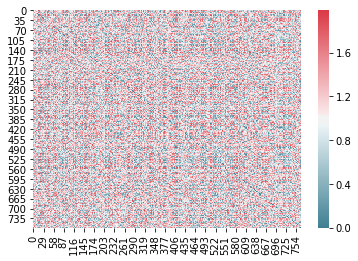

In [11]:
#Visualizando las distancias de correlation
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(distcor1, cmap=colormap, fmt=".2f")
plt.show()

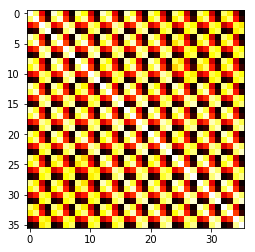

In [12]:
#Visualizing the correlation between columns of Landsat
data = pd.read_table("c://PW-PR/landsat.data", header=None,delim_whitespace=True)
Xl=data.iloc[:,0:36]
distcor=pairwise_distances(Xl.T,metric="correlation")
plt.imshow(1-distcor,cmap='hot')

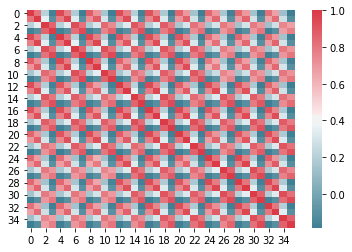

In [13]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(1-distcor, cmap=colormap, fmt=".2f")
plt.show()

### 2. Clustering using k-Means for Diabetes,k=2

In [14]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Xd)
clustlabels=kmeans.labels_
print(clustlabels)

[0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 

In [15]:
kmeans.cluster_centers_

array([[ 0.95874949,  0.43363662,  0.40679905, -0.14296386, -0.02520141,
         0.11848227,  0.03159628,  1.04966979],
       [-0.52576585, -0.23780073, -0.22308335,  0.07839954,  0.01382013,
        -0.06497415, -0.01732699, -0.57562537]])

In [16]:
#Finding the size of the two clusters formed
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[  0   1]
 [272 496]]


In [17]:
#Comparing the  clusters with the actual classes l
#pd.value_counts(yd.values, sort=False)
pd.crosstab(clustlabels,yd)

class,1,2
row_0,,
0,127,145
1,373,123


In [18]:
kmeans = KMeans(n_clusters=2, init='random', random_state=0).fit(Xd)
clustlabels1=kmeans.labels_
print(clustlabels1)

[1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 

### 3. Clustering using k-Means for Diabetes, k=3

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(Xd)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the three formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the three formed clusters
[[  0   1   2]
 [329 223 216]]


### 4. Applying k-Means to Landsat, k=6

In [21]:
#Cargando el conjunto de datos Landsat
url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y1=data.iloc[:,36]
X1=data.iloc[:,0:36]

In [22]:
scaler = StandardScaler()
scaler.fit(Xl)
Xl= scaler.transform(Xl)
kmeans = KMeans(n_clusters=6, random_state=0).fit(Xl)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the clusters")
print(np.asarray((unique_elements, counts_elements)))

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Size of the clusters
[[   0    1    2    3    4    5]
 [ 968 1514  865  568 1155 1365]]


In [23]:
#size of the actual groups
pd.value_counts(y1.values, sort=False)

4     626
1    1533
5     707
2     703
3    1358
7    1508
dtype: int64

### 5.  Kmeans applied to Shuttle, k=7

In [158]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)

In [159]:
ys=data.iloc[:,9]
Xs=data.iloc[:,0:9]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(Xs)
Xs= scaler.transform(Xs)
kmeans = KMeans(n_clusters=7, random_state=0).fit(Xs)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[    0     1     2     3     4     5     6]
 [25659  6121  2468   710  8532     5     5]]


In [160]:
#Size of the actual classes
pd.value_counts(ys.values, sort=False)

1    34108
2       37
3      132
4     6748
5     2458
6        6
7       11
dtype: int64

### 6. PAM Clustering for Diabetes, k=2

In [161]:
print(Xd)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [25]:
from Bio.Cluster import distancematrix
#Xd=np.array(Xd)
#distance = distancematrix(A)
#dist2=pairwise_distances(Xd)
#clusterid,b,c=Pycluster.kmedoids(dist2)
from Bio.Cluster import kmedoids
clusterid, error, nfound = kmedoids(dist2)

In [26]:
print (clusterid)

[711 315 711 315 315 711 315 315 711 711 315 711 711 315 711 315 315 711
 315 315 315 711 711 711 711 711 711 315 711 711 711 315 315 711 711 711
 711 711 315 711 315 711 711 711 711 711 315 315 711 315 315 315 711 711
 711 315 711 315 711 315 315 711 315 315 711 711 711 711 315 711 315 315
 711 315 315 315 711 315 315 315 315 315 711 315 711 315 711 315 711 315
 315 315 711 711 315 711 315 315 315 315 711 315 315 315 315 315 711 711
 315 315 315 711 315 315 711 711 711 315 315 315 315 315 315 711 315 315
 315 315 315 711 711 711 315 711 315 315 315 315 315 315 711 711 315 711
 315 711 711 711 711 315 315 711 711 315 711 711 315 315 315 711 711 711
 315 315 315 711 315 711 315 315 711 315 315 315 315 711 711 315 711 711
 711 315 315 315 711 711 711 711 711 315 315 711 711 315 711 315 315 315
 315 315 315 315 315 315 711 711 711 711 315 711 315 315 711 315 711 711
 315 711 711 711 315 711 315 711 315 315 315 315 315 315 315 315 315 315
 315 315 711 315 711 315 315 315 315 711 315 711 71

In [164]:
unique_elements, counts_elements = np.unique(clusterid, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[171 315]
 [336 432]]


In [165]:
#Comparing the  clusters with the actual classes 
pd.value_counts(y1.values, sort=False)
pd.crosstab(clusterid,yd)


class,1,2
row_0,,
171,148,188
315,352,80


### 7. Applying PAM clustering to Landsat

In [166]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)
X=np.matrix(X)
dist2=pairwise_distances(X)
clusterid,b,c=kmedoids(dist2,nclusters=6)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los seis clusters formados")
print(np.asarray((unique_elements, counts_elements)))

Tamano de los seis clusters formados
[[    0     1     2     3     4     5     6]
 [25659  6121  2468   710  8532     5     5]]


### 8. Clustering for  Diabetes using SOM

In [30]:
from Bio.Cluster import somcluster
clusterid,celldata=somcluster(Xd,nxgrid=2,nygrid=1)
print(clusterid)
clus=pd.DataFrame(clusterid)
#comparing the clusters with the actual classes
pd.crosstab(clus.sum(axis=1),yd)

[[0 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 0]
 [1 0]]


class,1,2
row_0,,
0,211,164
1,289,104


In [168]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(Xl)
clustlabels=kmeans.labels_

## 9. Clustering for Landsat using SOM

In [28]:
clusterid,celldata=somcluster(Xl,nxgrid=3,nygrid=2)
clus=pd.DataFrame(clusterid,columns=['A', 'B'])
#Finding the size of each cluster
clus = clus.groupby(clus.columns.tolist()).size().reset_index().rename(columns={0:'count'})
print( clus)

   A  B  count
0  0  0    420
1  0  1    928
2  1  0   1997
3  1  1   1084
4  2  0   1775
5  2  1    231
